In [1]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

# print(tf.__version__) 

In [2]:
from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

In [3]:
from IPython.display import clear_output

In [4]:
import random

In [5]:
import re

In [6]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

def show( img, name= 'noname'):
  plt.imshow( img)
  plt.title( name)
  plt.show()

def show_gimage( img, name= 'noname'):
  plt.imshow( img, cmap= 'gray')
  plt.title( name)
  plt.show()

def _load_image( path):
  # return cv2.imread( path, cv2.IMREAD_GRAYSCALE)
  return cv2.imread( path)
  
def write_image( path, img):
  cv2.imwrite( path, img)

def resize( img, scale_percent= 60, verbose=False):
  #scale_percent = 60 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  if verbose:
    print( "scale", scale_percent)
    print( "dim", dim)
  # resize image
  return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

In [104]:
# def cleanup(line):
#     return re.sub('[^0-9a-zA-Z -]+', '', line).replace( 'x', '')


In [7]:
pgnfile= "C:/mestrado/datasets/handmade/imagens-originais/pgn_30k_pt.txt"
with open(pgnfile) as f:
    lines = [line.rstrip() for line in f]
    
lines= [re.sub("[\[].*?[\]]", "", ln) for ln in lines]
lines= [ln[8:] for ln in lines]
lines= [ln.split()[0:32] for ln in lines]

pgnfile= "C:/mestrado/datasets/handmade/imagens-originais/pgn_30k_eng.txt"
with open(pgnfile) as f:
    en_lines = [line.rstrip() for line in f]
    
en_lines= [re.sub("[\[].*?[\]]", "", ln) for ln in en_lines]
en_lines= [ln[8:] for ln in en_lines]
# en_lines= [cleanup( ln) for ln in en_lines]
en_lines= [ln.split()[0:32] for ln in en_lines]

In [8]:
print( lines[0], en_lines[0])

['d4', 'f5', 'Cf3', 'g6', 'g3', 'Bg7', 'Bg2', 'Cf6', 'b4', 'c6', 'c4', 'd5', 'Db3', 'Be6', 'c5', 'Ce4', 'O-O', 'Cd7', 'Bf4', 'O-O', 'Cbd2', 'Bf7', 'De3', 'De8', 'Bh6', 'Cdf6', 'Ce5', 'Cxd2', 'Dxd2', 'Cd7', 'Bxg7', 'Rxg7'] ['d4', 'f5', 'Nf3', 'g6', 'g3', 'Bg7', 'Bg2', 'Nf6', 'b4', 'c6', 'c4', 'd5', 'Qb3', 'Be6', 'c5', 'Ne4', 'O-O', 'Nd7', 'Bf4', 'O-O', 'Nbd2', 'Bf7', 'Qe3', 'Qe8', 'Bh6', 'Ndf6', 'Ne5', 'Nxd2', 'Qxd2', 'Nd7', 'Bxg7', 'Kxg7']


In [108]:
len( lines)

30000

In [109]:
lines[0]

['d4',
 'f5',
 'Cf3',
 'g6',
 'g3',
 'Bg7',
 'Bg2',
 'Cf6',
 'b4',
 'c6',
 'c4',
 'd5',
 'Db3',
 'Be6',
 'c5',
 'Ce4',
 'O-O',
 'Cd7',
 'Bf4',
 'O-O',
 'Cbd2',
 'Bf7',
 'De3',
 'De8',
 'Bh6',
 'Cdf6',
 'Ce5',
 'Cd2',
 'Dd2',
 'Cd7',
 'Bg7',
 'Rg7']

In [131]:
# en_pgnfile= "C:/mestrado/datasets/handmade/imagens-originais/pgn_30k_eng.txt"
# en_lines= open( en_pgnfile)
# with open(en_pgnfile) as f:
#     content = f.readlines()
# # you may also want to remove whitespace characters like `\n` at the end of each line
# content = [x.strip() for x in content] 
# en_lines= [ln[8:-1].split()[0:100] for ln in content]



In [9]:
#
# gera imagem com jogadas escritas com fonte manuscrito
#
from PIL import Image, ImageDraw
from PIL import ImageColor

In [10]:
# abre o arquivo original
img = Image.open("C:/mestrado/datasets/syn/template/template.jpg")  # load base image
dctx = ImageDraw.Draw(img)  # create drawing context

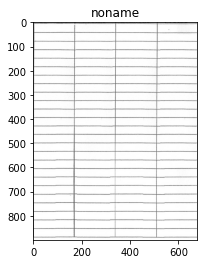

In [11]:
show( img)

In [12]:
# -*- coding: utf-8 -*-
from PIL import ImageFont


In [21]:
fnt= ImageFont.truetype('c:/fonts/GOODDP__.TTF', 30)

In [39]:
#     img = Image.open("C:/mestrado/datasets/syn/template/template.jpg")  # load base image
#     dctx = ImageDraw.Draw(img)  # create drawing context

#     i= 0
#     for ln in range( 0, 8):
#         for col in range( 0, 2):
#             if i>= len( line):
#                 del dctx
#                 return img
            
def load_fonts():
    files= glob( "C:/fonts/*.ttf")
    fonts= []
    for f in files:
        fnt= ImageFont.truetype(f, 30)
        fonts.append( (f, fnt))
    return fonts
        
    
all_fonts= load_fonts()    
        
for name,fnt in all_fonts:    
    img = Image.open("C:/mestrado/datasets/syn/template/template.jpg")  # load base image
    dctx = ImageDraw.Draw(img)  # create drawing context

    line= "CBxd4+"

    dh_top= 7
    dh_bottom= 13
    h= (img.height - dh_top - dh_bottom)/25.0
    w= img.width/4.0

    txtsz = dctx.textsize(line, fnt)
    x= (w - txtsz[0])/2
    y= 7 + (h - txtsz[1])/2 #+ margin_top
    dctx.text( (x, y), line, font=fnt, fill="#000000")

    imgc= img.crop( (0, 0, w, h+7*2))
    
    imgfile= os.path.join( "C:/mestrado/datasets/samples_font", Path(name).name+".jpg")
    print( 'save to ', imgfile)
    imgc.save( imgfile)    


save to  C:/mestrado/datasets/samples_font\42.ttf.jpg
save to  C:/mestrado/datasets/samples_font\A Sensible Armadillo.ttf.jpg
save to  C:/mestrado/datasets/samples_font\Absinthe.ttf.jpg
save to  C:/mestrado/datasets/samples_font\adam.ttf.jpg
save to  C:/mestrado/datasets/samples_font\adamb.ttf.jpg
save to  C:/mestrado/datasets/samples_font\adambital.ttf.jpg
save to  C:/mestrado/datasets/samples_font\aescrawl.ttf.jpg
save to  C:/mestrado/datasets/samples_font\Akong_agi.ttf.jpg
save to  C:/mestrado/datasets/samples_font\AlanisHand.ttf.jpg
save to  C:/mestrado/datasets/samples_font\Albumme Smooth.ttf.jpg
save to  C:/mestrado/datasets/samples_font\alphabetized cassette tapes.ttf.jpg
save to  C:/mestrado/datasets/samples_font\AlphaThin.ttf.jpg
save to  C:/mestrado/datasets/samples_font\ANGEL___.ttf.jpg
save to  C:/mestrado/datasets/samples_font\Anke Print.TTF.jpg
save to  C:/mestrado/datasets/samples_font\Another_.ttf.jpg
save to  C:/mestrado/datasets/samples_font\APPETITE.TTF.jpg
save to  

save to  C:/mestrado/datasets/samples_font\protection.ttf.jpg
save to  C:/mestrado/datasets/samples_font\ProtestPaintBB.ttf.jpg
save to  C:/mestrado/datasets/samples_font\ProtestPaintBB_ital.ttf.jpg
save to  C:/mestrado/datasets/samples_font\Qokijo.ttf.jpg
save to  C:/mestrado/datasets/samples_font\QUIGLEYW.TTF.jpg
save to  C:/mestrado/datasets/samples_font\Quikhand.ttf.jpg
save to  C:/mestrado/datasets/samples_font\Quirlycues.ttf.jpg
save to  C:/mestrado/datasets/samples_font\rabiohead.ttf.jpg
save to  C:/mestrado/datasets/samples_font\razor keen.ttf.jpg
save to  C:/mestrado/datasets/samples_font\REBECCA_.TTF.jpg
save to  C:/mestrado/datasets/samples_font\Remnant-Regular.ttf.jpg
save to  C:/mestrado/datasets/samples_font\resurgen.ttf.jpg
save to  C:/mestrado/datasets/samples_font\robot.ttf.jpg
save to  C:/mestrado/datasets/samples_font\roddy.ttf.jpg
save to  C:/mestrado/datasets/samples_font\roddybold.ttf.jpg
save to  C:/mestrado/datasets/samples_font\Rudiment.ttf.jpg
save to  C:/mest

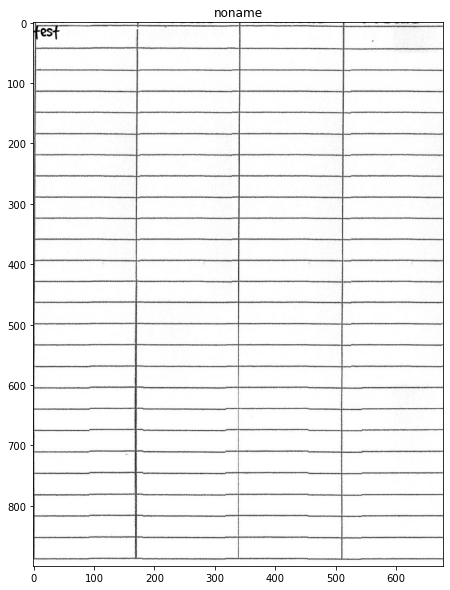

In [23]:
showbig( img)

In [18]:
fonts= [
    ImageFont.truetype('c:/Windows/Fonts/BRADHITC.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/CHILLER.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/FORTE.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/ITCKRIST.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/FREESCPT.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/LHANDW.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/GIGI.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/Gabriola.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/Inkfree.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/MTCORSVA.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/LCALLIG.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/MTCORSVA.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/OCRAEXT.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/PRISTINA.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/RAGE.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/TEMPSITC.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/PAPYRUS.TTF', 30),
#     ImageFont.truetype('c:/Windows/Fonts/PRISTINA.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/MAIAN.TTF', 30)
] 


In [15]:
def showbig( img, name= 'noname'):
    plt.figure(figsize = (10,10))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    

    
    
#----------------------
# generate
#----------------------
# for i in range( 0, 10000):
#     if i%100== 0:
#         print( i)
#     generate_one( lines[i], " ".join( en_lines[i]), i)             

#----------------------
# show image
#----------------------
# i= 0
# for f in fonts:
#     print( i, f.getname())
#     img= generate_for( lines[2], f)
#     showbig( img)
#     i+= 1

In [21]:
import glob

In [22]:
#
#  gerar somente os que nao tem no handwritten
#

# carrega os jogos existentes
handfiles= glob.glob( "C:/mestrado/datasets/unified/parts/handwritten/labels/*.pgn")

In [23]:
print( len( handfiles))

3422


In [24]:
fname= handfiles[0]


In [26]:
Path(fname).name.split('_')

['a3',
 '',
 'd5',
 '',
 'd4',
 '',
 'Nf6',
 '5742',
 '1494',
 'R',
 'part3',
 'scan0145.pgn']

In [25]:
# a3__d5__d4__Nf6_5742_1494_R_part3_scan0145
id= int( Path(fname).name.split('_')[-5])-1
print( id)

5741


In [27]:
print( read_label( fname))

a3 d5 d4 Nf6 Nf3 Bg4 e3 e6 Be2 Bd6 c4 c6 Nbd2 Nbd7 b4 O-O Bb2 Ne4 Ne5 Bxe2 Qxe2 Nxd2 Qxd2 Bxe5 dxe5 dxc4 Rd1 Nb6 Qe2 Qc7 Qg4 c5 O-O cxb4 axb4 c3 Rc1 Na4 Rxc3 Nxc3 Rc1 Rfd8 Bxc3 Rac8 h3 Qc4 e4 Qd3 Qh4 Rd7


In [171]:
" ".join( en_lines[ id])

'a3 d5 d4 Nf6 Nf3 Bg4 e3 e6 Be2 Bd6 c4 c6 Nbd2 Nbd7 b4 O-O Bb2 Ne4 Ne5 Bxe2 Qxe2 Nxd2 Qxd2 Bxe5 dxe5 dxc4 Rd1 Nb6 Qe2 Qc7 Qg4 c5 O-O cxb4 axb4 c3 Rc1 Na4 Rxc3 Nxc3 Rc1 Rfd8 Bxc3 Rac8 h3 Qc4 e4 Qd3 Qh4 Rd7'

In [185]:
for f in handfiles:
    if 'scan' not in Path(f).name:
        print( Path(f).name)


In [28]:
s= set()
for f in handfiles:
    s.add( int( Path(f).name.split('_')[-5][-4:])-1)

In [29]:
print( len( s))

2742


In [133]:
#
# filtra os que tem manual, os que tem tamanho menor de 16
#
new_lines= []
new_en_lines=[]
new_no= []

for i in range( 0, len( lines)):
    if len( en_lines[i])< 32:
        continue
    if i in s:
        continue
    new_lines.append( lines[i]) 
    new_en_lines.append( en_lines[i]) 
    new_no.append( i)    

In [134]:
print( len( new_lines))
print( len( s))
print( len( lines))

25272
2742
30000


In [135]:
print( new_no[0:10])

[48, 49, 89, 163, 177, 273, 312, 360, 628, 629]


In [136]:
#
# separa em valid e test
#
n= len( new_lines)

# precisa fazer shuffle?

n_train= int(n*0.8)
new_train_lines= new_lines[:n_train]
new_train_en_lines=new_en_lines[:n_train]
new_train_no= new_no[:n_train]

new_valid_lines= new_lines[n_train:]
new_valid_en_lines=new_en_lines[n_train:]
new_valid_no= new_no[n_train:]

In [137]:
print( n, n_train)

25272 20217


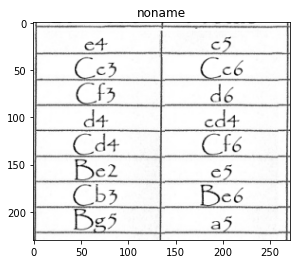

In [140]:
dh_top= 7
dh_bottom= 13
h= (img.height - dh_top - dh_bottom)/25.0
w= img.width/4.0

margin_left= w/4
margin_top= h/6

def resize_fixed( img):
  dd = (271, 230) #width, height
  return cv2.resize(img, dd, interpolation = cv2.INTER_AREA) 

def generate_for( line, fnt=None):
    if fnt is None:
        fnt= random.choice( fonts)
#     print( fnt.getname())
    
    img = Image.open("C:/mestrado/datasets/syn/template/template.jpg")  # load base image
    dctx = ImageDraw.Draw(img)  # create drawing context

    i= 0
    for ln in range( 0, 8):
        for col in range( 0, 2):
            if i>= len( line):
                del dctx
                return img
            
            txtsz = dctx.textsize(line[i], fnt)

            x= w* col + (w - txtsz[0])/2
            y= dh_top + h*ln + (h - txtsz[1])/2 #+ margin_top

            dctx.text( (x, y), line[i], font=fnt, fill="#000000")
            i= i+1

#     for ln in range( 0, 25):
#         for col in range( 2, 4):
#             if i>= len( line):
#                 del dctx
#                 return img
            
#             txtsz = dctx.textsize(line[i], fnt)

#             x= w* col + (w - txtsz[0])/2
#             y= dh_top + h*ln #+ margin_top

#             dctx.text( (x, y), line[i], font=fnt, fill="#000000")
#             i+= 1
            
    del dctx
    return img

def cut( img):
    h= 300
    w= 345

    img1= img[:h, :w]
    return img1



def generate_one( pt_line, pgn, no, folder):
    img= generate_for( pt_line)
    img= cut( np.asarray(img))
    img= resize_fixed( img)
    img= PIL.Image.fromarray(np.uint8(img))

    fname= "syn_"+str(no).zfill(5)
    img.save( 
        os.path.join( 
            "C:/mestrado/datasets/unified/parts/synthesized_8lines_30kexcept-handwritten", folder,
            "images", fname+ ".jpg"))

    write_label( 
        os.path.join( 
            "C:/mestrado/datasets/unified/parts/synthesized_8lines_30kexcept-handwritten", folder,
            "labels", fname+ ".pgn"), pgn)        
    
    return img

img__= generate_one( new_train_lines[0], " ".join( new_train_en_lines[0]), new_train_no[0]+1, 'train')
show( img__)

In [142]:
for i in range( 0, len( new_train_lines)):
    if i%100== 0:
        print( 'train', i)
    generate_one( new_train_lines[i], " ".join( new_train_en_lines[i]), new_train_no[i]+1, 'train')
    
for i in range( 0, len( new_valid_lines)):
    if i%100== 0:
        print( 'valid', i)
    generate_one( new_valid_lines[i], " ".join( new_valid_en_lines[i]), new_valid_no[i]+1, 'valid')

train 0
train 100
train 200
train 300
train 400
train 500
train 600
train 700
train 800
train 900
train 1000
train 1100
train 1200
train 1300
train 1400
train 1500
train 1600
train 1700
train 1800
train 1900
train 2000
train 2100
train 2200
train 2300
train 2400
train 2500
train 2600
train 2700
train 2800
train 2900
train 3000
train 3100
train 3200
train 3300
train 3400
train 3500
train 3600
train 3700
train 3800
train 3900
train 4000
train 4100
train 4200
train 4300
train 4400
train 4500
train 4600
train 4700
train 4800
train 4900
train 5000
train 5100
train 5200
train 5300
train 5400
train 5500
train 5600
train 5700
train 5800
train 5900
train 6000
train 6100
train 6200
train 6300
train 6400
train 6500
train 6600
train 6700
train 6800
train 6900
train 7000
train 7100
train 7200
train 7300
train 7400
train 7500
train 7600
train 7700
train 7800
train 7900
train 8000
train 8100
train 8200
train 8300
train 8400
train 8500
train 8600
train 8700
train 8800
train 8900
train 9000
train 9100
